<a href="https://www.kaggle.com/code/arihant18/covid-19-detection?scriptVersionId=191416066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import numpy as np
import pandas as pd 
import os
from tensorflow.keras.utils import image_dataset_from_directory
import keras
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras import Model

2024-08-06 13:47:38.027129: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 13:47:38.027262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 13:47:38.163005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train='/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/'
test ='/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/'

In [5]:
train_ds =image_dataset_from_directory(train,
                                       batch_size=148
                                      )
test_ds =image_dataset_from_directory(test,
                                      batch_size=40
                                      )

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [28]:
single_batch = train_ds.as_numpy_iterator().next()
train_x, train_y = single_batch[0]/255, single_batch[1].reshape(-1,1)
print(train_x.shape, train_y.shape)

single_batch = test_ds.as_numpy_iterator().next()
test_x, test_y = single_batch[0]/255, single_batch[1].reshape(-1,1)
print(test_x.shape, test_y.shape)

(148, 256, 256, 3) (148, 1)
(40, 256, 256, 3) (40, 1)


In [29]:
label=os.listdir(train)
label

['PNEUMONIA', 'NORMAL']

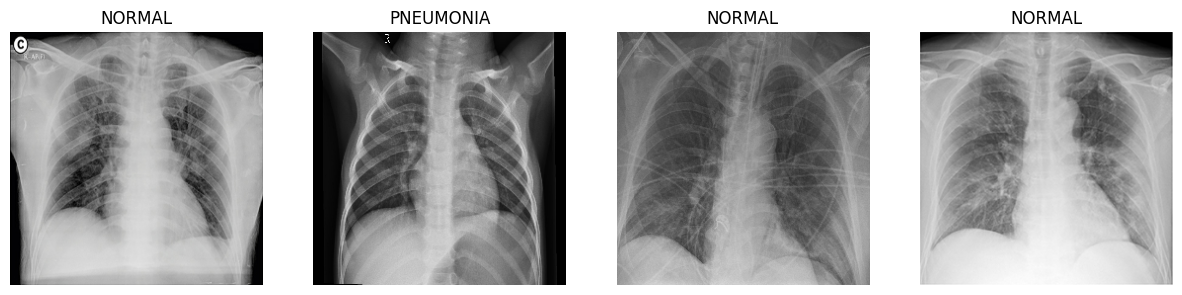

In [31]:
fig, ax = plt.subplots(1,4, figsize=(15,15))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(train_x[i])
    ax[i].set_title(label[train_y[i,0]])

In [32]:
ResNet = ResNet50(include_top=False, input_shape=train_x[0].shape)

In [33]:
for layer in ResNet.layers:
    layer.trainable = False
print("Number of trainable parameters:",len(ResNet.trainable_variables))

Number of trainable parameters: 0


In [34]:
X = Flatten()(ResNet.output)
output = Dense(1, activation='sigmoid')(X)
model = Model(ResNet.input, output)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,718,785 (90.48 MB)

 Trainable params: 131,073 (512.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [35]:
adam = keras.optimizers.Adam(0.01)
loss = keras.losses.BinaryCrossentropy()

model.compile(loss=loss, optimizer= adam, metrics=['f1_score', 'accuracy'])

In [36]:
History=model.fit(
            train_x, 
            train_y, 
            batch_size=64, 
            epochs = 15,
            validation_data = (test_x, test_y)         
                 ).history

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - accuracy: 0.5000 - f1_score: 0.6667 - loss: 39.4116 - val_accuracy: 0.5000 - val_f1_score: 0.6667 - val_loss: 12.2767
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.4456 - f1_score: 0.4662 - loss: 35.8431 - val_accuracy: 0.5000 - val_f1_score: 0.0000e+00 - val_loss: 79.8953
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.4902 - f1_score: 0.0000e+00 - loss: 72.2518 - val_accuracy: 0.5000 - val_f1_score: 0.6667 - val_loss: 14.4058
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.4902 - f1_score: 0.6579 - loss: 22.6478 - val_accuracy: 0.5000 - val_f1_score: 0.6667 - val_loss: 29.4945
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.4966 - f1_score: 0.6469 - loss: 20.6661 - val_accuracy: 0.5000 - val_f1_score: 0.0000e+00 - val_loss: 25.5375
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.5078 - f1_score: 0.0000e+00 - loss: 25.9595 - val_accuracy: 0.8250 - val_f1

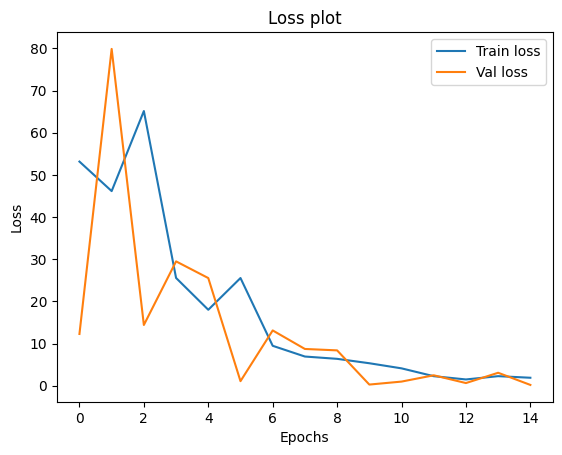

In [37]:
plt.title('Loss plot')
plt.plot(History['loss'])
plt.plot(History['val_loss'])
plt.legend(['Train loss', 'Val loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs');

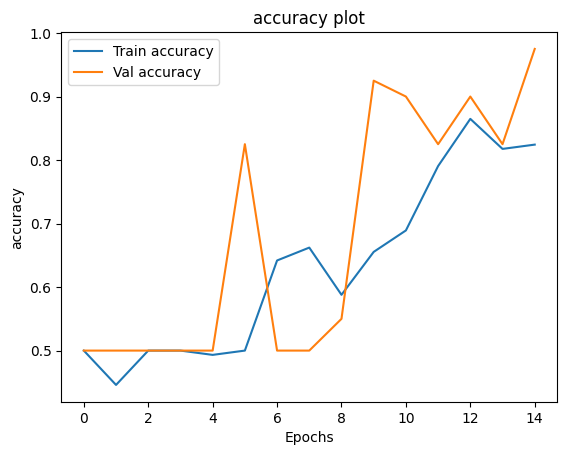

In [38]:
plt.title('accuracy plot')
plt.plot(History['accuracy'])
plt.plot(History['val_accuracy'])
plt.legend(['Train accuracy', 'Val accuracy'])
plt.ylabel('accuracy')
plt.xlabel('Epochs');

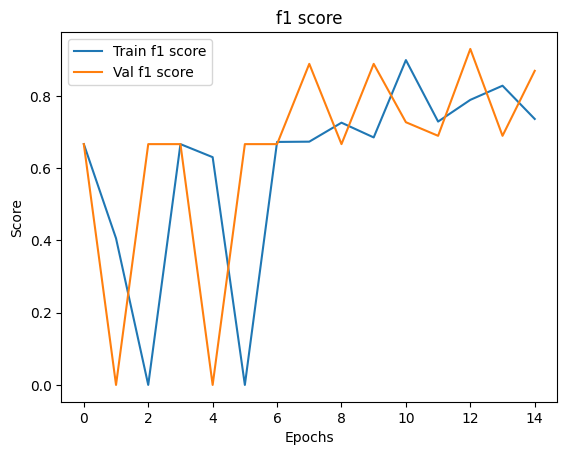

In [40]:
plt.title('f1 score')
plt.plot(History['f1_score'])
plt.plot(History['val_f1_score'])
plt.legend(['Train f1 score', 'Val f1 score'])
plt.ylabel('Score')
plt.xlabel('Epochs');

In [44]:
y_pred = (model.predict(test_x).reshape(-1,)>=0.5).astype(int)
accuracy = np.sum(test_y[:,0]==y_pred)/len(y_pred)

print("The model have an accuracy of:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
The model have an accuracy of: 0.975


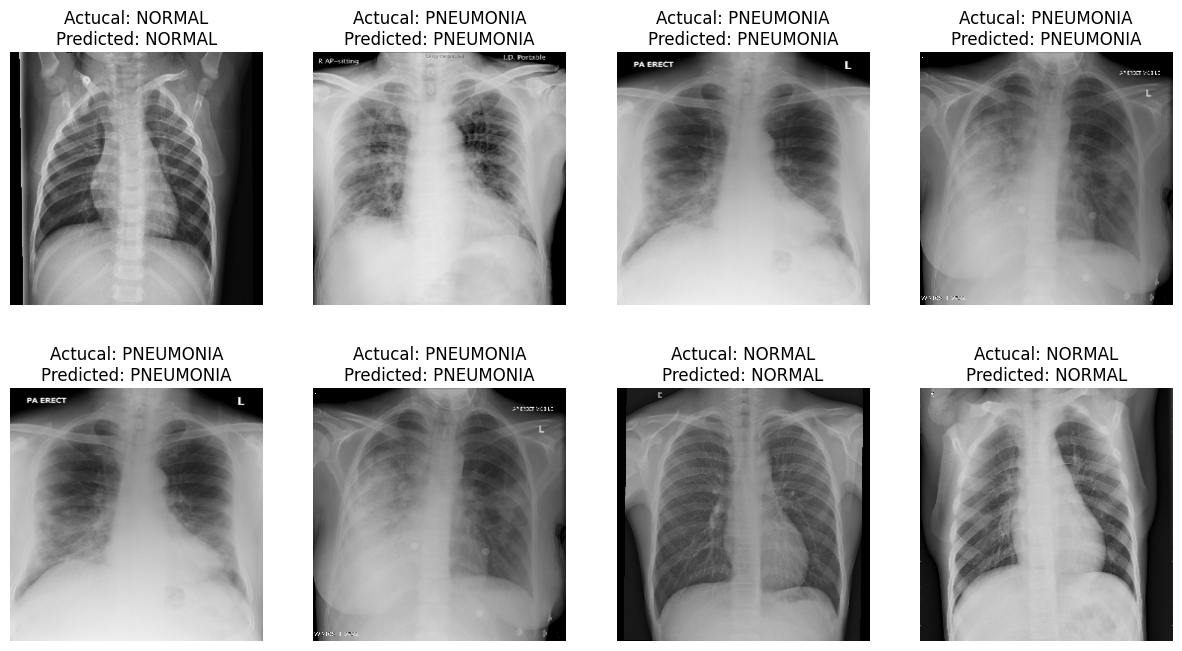

In [53]:
fig,ax= plt.subplots(2,4, figsize=(15, 8))
for i in range(2):
    for j in range(4):
        idx=2*i+j
        ax[i][j].imshow(test_x[idx])
        ax[i][j].axis('off')
        ax[i][j].set_title(f'Actucal: {label[abs(test_y[idx,0]-1)]}\nPredicted: {label[abs(y_pred[idx]-1)]}')

In [52]:
model.save('model.h5')